# 2.2 Definição Baseline - Spacy

In [1]:
import nltk
import csv
import pandas as pd
import numpy as np
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
from collections import Counter
import itertools 
import re

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\vasco\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\vasco\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\vasco\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Loading dos datasets como dataframes

In [3]:
train_clean = pd.read_csv("train_clean.csv", encoding="utf-8")
test_clean = pd.read_csv("test_clean.csv", encoding="utf-8")
print(train_clean.head(10))
print(test_clean.head(10))

                                                text label
0  ['typical', 'cheerful', 'colorful', 'mgm', 'mu...   pos
1  ['another', 'reviewer', 'states', 'hanna', 'wa...   pos
2  ['one', 'best', 'amitabh', 'comeback', 'movies...   pos
3  ['peter', 'sollett', 'created', 'endearing', '...   pos
4  ['film', 'NOT_visually', 'NOT_stunning', 'NOT_...   pos
5  ['NOT_bela', 'NOT_lagosi', 'NOT_best', 'NOT_mo...   pos
6  ['happened', 'watch', 'movie', 'chance', 'days...   pos
7  ['many', 'consider', 'black', 'cat', 'best', '...   pos
8  ['saw', 'screening', 'last', 'night', 'totally...   pos
9  ['one', 'best', 'true', 'crime', 'movies', 'ev...   pos
                                                text label
0  ['logan', 'lerman', 'dean', 'collins', 'iii', ...   pos
1  ['seen', 'film', 'sunday', 'evening', 'must', ...   pos
2  ['two', 'great', 'stars', 'legendary', 'direct...   pos
3  ['originally', 'brazil', 'sad', 'thing', 'movi...   pos
4  ['witchery', 'decent', 'little', 'euro', 'tras...   p

In [4]:
import spacy
from spacy.training.example import Example
from spacy.util import minibatch, compounding
import random

In [100]:
train_data = []

for i, row in train_clean.iterrows():
    tokens = row['text']
    label = row['label']

    text_str = " ".join(tokens)  # junta os tokens de novo num texto
    cats = {"pos": 1.0 if label == "pos" else 0.0,
            "neg": 1.0 if label == "neg" else 0.0}
    
    train_data.append((text_str, {"cats": cats}))

# mesmo para o conjunto de teste
test_data = []

for i, row in test_clean.iterrows():
    tokens = row['text']
    label = row['label']

    text_str = " ".join(tokens)  # junta os tokens de novo num texto
    cats = {"pos": 1.0 if label == "pos" else 0.0,
            "neg": 1.0 if label == "neg" else 0.0}
    
    test_data.append((text_str, {"cats": cats}))


In [196]:
train_data[:5]
test_data[:5]

[('logan lerman dean collins iii jack bobby fame provide nice touch familiarity friends even NOT_maybe NOT_close NOT_may NOT_jack NOT_bobby NOT_expressions NOT_young NOT_students NOT_taking NOT_stand NOT_good NOT_cause NOT_well NOT_expressed NOT_movie.logan NOT_lerman NOT_may NOT_seemingly NOT_typecast NOT_roles NOT_different NOT_thusly NOT_seen NOT_seen NOT_well NOT_jack NOT_bobby.the NOT_movie NOT_also NOT_opens NOT_nice NOT_tune NOT_coined NOT_lost NOT_45 NOT_wondering NOT_lions song always heard speaker old job christmastreeshops got played local radio show lost45s hosted barry scott last time suggested movie dedication dedication left out.environmentalist demonstration well expressed movie protection ground owls seen movie too.what hoot movie is.hoot sogive hoot tradition woodsey owl commercials 1970s truthfully stephen steve g. baer a.k.a ste',
  {'cats': {'pos': 1.0, 'neg': 0.0}}),
 ('seen film sunday evening must say NOT_better NOT_way NOT_end NOT_weekend totally pleased humor 

In [ ]:
# Criar pipeline vazia
nlp = spacy.blank("en")

# Adicionar TextCategorizer
text_cat = nlp.add_pipe("textcat", last=True)

# Adicionar rótulos
text_cat.add_label("pos")
text_cat.add_label("neg")

In [ ]:
# Treinamento (+- 15 min)
# optimizador inicial dos pesos
optimizer = nlp.begin_training()

for i in range(10):  # número de épocas
    random.shuffle(train_data) # shuffle dos dados de treino
    losses = {}
    batches = minibatch(train_data, size=compounding(4.0, 32.0, 1.5)) # tamanho dos batches, começa em 4 e aumenta até 32 (aumenta 1.5x a cada iteração)
    for batch in batches:
        examples = []
        for text, annotations in batch:
            doc = nlp.make_doc(text) # doc cria uam representação do texto que vai permitir para treino (lemmatização, POS, ...)
            examples.append(Example.from_dict(doc, annotations)) # cria um exemplo a partir do doc e das labels
        nlp.update(examples, sgd=optimizer, losses=losses) # o verdadeiro treino, atualiza os pesos do modelo
    print(f"Losses at iteration {i}: {losses}")


Losses at iteration 0: {'textcat': 82.03230953961611}
Losses at iteration 1: {'textcat': 41.86142583144829}
Losses at iteration 2: {'textcat': 23.04762077740179}
Losses at iteration 3: {'textcat': 16.25845363972485}
Losses at iteration 4: {'textcat': 12.666018653772142}
Losses at iteration 5: {'textcat': 10.299658231940711}
Losses at iteration 6: {'textcat': 7.711229378287992}
Losses at iteration 7: {'textcat': 7.023197181740998}
Losses at iteration 8: {'textcat': 6.722470275472285}
Losses at iteration 9: {'textcat': 5.816801186507102}


In [189]:
doc = nlp(test_data[0][0]) # exemplo
doc.cats  # Probabilidades para cada categoria (neg e pos) do texto

{'pos': 0.8321468830108643, 'neg': 0.16785314679145813}

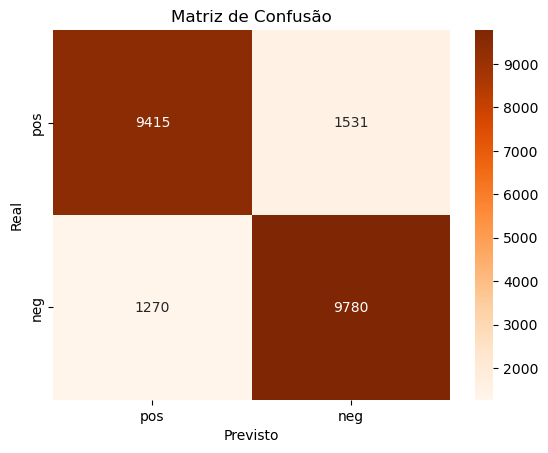

              precision    recall  f1-score   support

         pos       0.86      0.89      0.87     11050
         neg       0.88      0.86      0.87     10946

    accuracy                           0.87     21996
   macro avg       0.87      0.87      0.87     21996
weighted avg       0.87      0.87      0.87     21996



In [200]:
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

true_labels = []
predicted_labels = []

# Iterate over each example in the test_data
for text, annotations in test_data:
    doc = nlp(text)  # Process the text with spaCy model

    # Ensure there is a valid output in doc.cats
    if not doc.cats:
        print(f"Empty prediction for text: {text}")
        continue # Skip if no prediction was made

    # Get the predicted category (label) with the highest probability
    predicted = max(doc.cats, key=doc.cats.get)
    # Determine the true label from annotations
    actual = "pos" if annotations["cats"]["pos"] > annotations["cats"]["neg"] else "neg"

    predicted_labels.append(predicted)
    true_labels.append(actual)

# Matriz de confusão
cm = confusion_matrix(true_labels, predicted_labels, labels=["pos", "neg"])

# Mostrar matriz com seaborn
sns.heatmap(cm, annot=True, fmt="d", xticklabels=["pos", "neg"], yticklabels=["pos", "neg"], cmap="Oranges")
plt.xlabel("Previsto")
plt.ylabel("Real")
plt.title("Matriz de Confusão")
plt.show()

# Também podes imprimir relatório completo:
print(classification_report(true_labels, predicted_labels, target_names=["pos", "neg"]))
